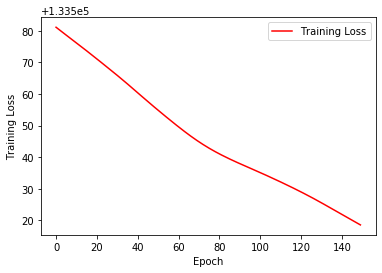

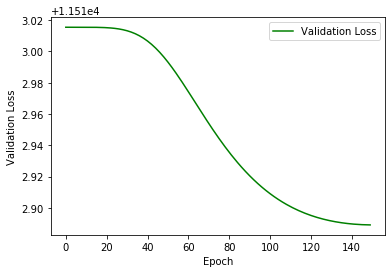

Accuracy_score=
10.0
Classification report=
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.10      1.00      0.18      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

Confusion matrix=
[[   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    

C:\Users\Astrid\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [5]:
#Task 1
#import required libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy
import numpy as np
import matplotlib.pyplot as plt
import util_mnist_reader
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Get the X_train and Y_Train data
X_train, Y_train_old = util_mnist_reader.load_mnist('data/fashion', kind='train')
X_test, Y_test_old = util_mnist_reader.load_mnist('data/fashion', kind='t10k')

n_values = np.max(Y_train_old) + 1
Y_train=(np.eye(n_values)[Y_train_old])
Y_train=np.transpose(Y_train)

#perform hot encoding
n_values1 = np.max(Y_test_old) + 1
Y_test=(np.eye(n_values1)[Y_test_old])
Y_test=np.transpose(Y_test)

train_samples = len(X_train)
test_samples = len(X_test)

#Set weights and bias
bias = np.ones((train_samples,1))
X_train = np.append(X_train, bias, 1)
X_train = np.transpose(X_train)

bias = np.ones((test_samples,1))
X_test = np.append(X_test, bias, 1)
X_test = np.transpose(X_test)

n_x = X_train.shape[0]
n_h = 10#output nodes
nodes =50
input_nodes = len(X_train)
W1 = np.random.randn(nodes,input_nodes) 
W2= np.random.randn(nodes, n_h)
b = np.zeros((1, 1))
#W1 = np.zeros((nodes, input_nodes))
#W2 = np.zeros((nodes, n_h))

W1_test = np.zeros((nodes, input_nodes))
W2_test = np.zeros((nodes, n_h))

def softmax(x):
    """Compute the softmax of vector x."""
    exps = np.exp(x)
    return exps / np.sum(exps)

def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

def compute_cost(A2, Y):
    m = len(Y)
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2), (1-Y))
    cost = (-1/m)*np.sum(logprobs)
    cost = np.squeeze(cost)    
    return cost
cost_loss=[]
cost_loss_test=[]
epochs=150
learning_rate=0.0001
for epoch in range(epochs):
    Z1 = np.dot(W1, X_train)
    Z1_test=np.dot(W1_test,X_test)
    A1 = sigmoid(Z1)        # You can use np.tanh activation here which is from (-1,1)
    A1_test=sigmoid(Z1_test)
    Z2 = np.dot(W2.T, A1)
    Z2_test=np.dot(W2_test.T,A1_test)
    A2 = (softmax(Z2))
    A2_test=(softmax(Z2_test))
    #print(A2)
    cost=compute_cost(A2,Y_train)
    cost_test=compute_cost(A2_test,Y_test)
    cost_loss.append(np.squeeze(cost))
    cost_loss_test.append(np.squeeze(cost_test))
    dZ2 = A2-Y_train
    dZ2_test=A2_test-Y_test
    dW2 = (1/train_samples) * np.matmul(dZ2, A1.T)
    dW2_test=(1/test_samples) * np.matmul(dZ2_test, A1_test.T)
    #db2 = (1./train_samples) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2, dZ2)
    dA1_test = np.matmul(W2_test, dZ2_test)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dZ1_test = dA1_test * sigmoid(Z1_test) * (1 - sigmoid(Z1_test))
    dW1 = (1/train_samples) * np.matmul(dZ1, X_train.T)
    dW1_test = (1/test_samples) * np.matmul(dZ1_test, X_test.T)
    W2 = W2 - learning_rate * dW2.T
    W2_test = W2_test - learning_rate * dW2_test.T
    #b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    W1_test = W1_test - learning_rate * dW1_test
    #b1 = b1 - learning_rate * db1
    #print(dA1)
    #Plotting graph    

    #print("Epoch", epoch, "cost: ", cost)
#Plotting required graphs
plt.plot(cost_loss,'r',label='Training Loss')   
plt.xlabel('Epoch')
plt.ylabel('Training Loss')  
plt.legend()
plt.show()

plt.plot(cost_loss_test,'g',label='Validation Loss')   
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')  
plt.legend()
plt.show()

max_ar=[]
count=0
for i in range(0,X_train.shape[1]):
    max_ar.append(np.argmax(A2.T[i]))
for i in range(0,X_train.shape[1]):
    if(max_ar[i]==Y_train_old[i]):
        count=count+1
count=((count/X_train.shape[1]))*100 
#print("Accuracy Score")
#print(count)

Z1_test1=np.dot(W1_test,X_test)
A1_test1=sigmoid(Z1_test1)
Z2_test1=np.dot(W2_test.T,A1_test1)
A2_test1=(softmax(Z2_test1))
predicted_values = np.argmax(A2_test1.T,axis=1)
print('Accuracy_score=')
print(accuracy_score(Y_test_old,predicted_values)*100)
print('Classification report=')
print(classification_report(Y_test_old,predicted_values))
print('Confusion matrix=')
print(confusion_matrix(Y_test_old,predicted_values))


C:\Users\Astrid\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Train on 40199 samples, validate on 19801 samples
Epoch 1/5
40199/40199 [==============================] - 9s 224us/step - loss: 0.5014 - accuracy: 0.8182 - val_loss: 0.3908 - val_accuracy: 0.8572
Epoch 2/5
40199/40199 [==============================] - 9s 227us/step - loss: 0.3735 - accuracy: 0.8624 - val_loss: 0.3885 - val_accuracy: 0.8673
Epoch 3/5
40199/40199 [==============================] - 9s 215us/step - loss: 0.3292 - accuracy: 0.8794 - val_loss: 0.3380 - val_accuracy: 0.8786
Epoch 4/5
40199/40199 [==============================] - 8s 210us/step - loss: 0.3083 - accuracy: 0.8848 - val_loss: 0.3493 - val_accuracy: 0.8738
Epoch 5/5
40199/40199 [==============================] - 8s 211us/step - loss: 0.2856 - accuracy: 0.8937 - val_loss: 0.3478 - val_accuracy: 0.8789


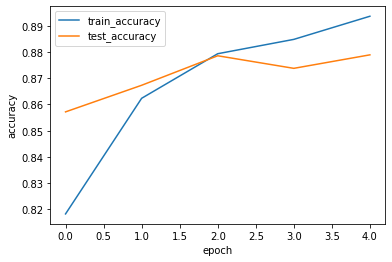

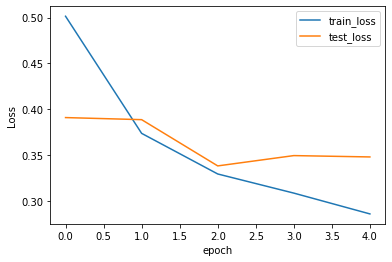

10000/10000 [==============================] - 1s 64us/step
Confusion Matrix:
[[748   1  10  42   5   1 185   0   8   0]
 [  1 965   0  25   2   0   7   0   0   0]
 [ 11   0 722  19 121   0 125   0   2   0]
 [ 13   6   5 906  31   0  33   0   6   0]
 [  0   2  75  32 828   0  56   0   7   0]
 [  0   0   0   1   0 924   4  48   3  20]
 [ 84   1  54  31 109   0 710   0  11   0]
 [  0   0   0   0   0   9   0 965   1  25]
 [  3   1   0   7   5   1  10   4 969   0]
 [  0   0   0   0   0  12   0  44   2 942]]
Accuracy Score:
86.79


In [8]:
#task 2
#importing libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense, Input, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
import keras
import util_mnist_reader
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
X_train, Y_train = util_mnist_reader.load_mnist('data/fashion', kind='train')
X_test, Y_test = util_mnist_reader.load_mnist('data/fashion', kind='t10k')


#plt.imshow(X_train[0].reshape((28, 28)), cmap = 'gray')

# simple model
def simple_model(x_train, y_train):
    inputs = Input(shape=(784,))
    x = BatchNormalization()(inputs)
    x = Dense(128, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(10, activation='softmax')(x)
    model = Model(input=inputs, output=predictions)
    model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])
    history = model.fit(x_train, to_categorical(y_train), epochs=5, shuffle=True, validation_split=0.33)
    return history


#Plotting required graphs
def show_history(history):
    #acc = history.history['binary_accuracy']
    #val_acc = history.history['val_binary_accuracy']
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'test_loss'], loc='best')
    plt.show()
simple_history = simple_model(X_train,Y_train)    
show_history(simple_history)

simple_history.model.evaluate(X_test, to_categorical(Y_test))
predict=simple_history.model.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(Y_test,predict.argmax(axis=1)))
print('Accuracy Score:')
print(accuracy_score(Y_test,predict.argmax(axis=1))*100)

C:\Users\Astrid\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Train on 40199 samples, validate on 19801 samples
Epoch 1/10
40199/40199 [==============================] - 87s 2ms/step - loss: 0.6504 - accuracy: 0.7687 - val_loss: 0.4722 - val_accuracy: 0.8474
Epoch 2/10
40199/40199 [==============================] - 104s 3ms/step - loss: 0.4699 - accuracy: 0.8331 - val_loss: 0.5178 - val_accuracy: 0.8611
Epoch 3/10
40199/40199 [==============================] - 104s 3ms/step - loss: 0.4393 - accuracy: 0.8454 - val_loss: 0.4036 - val_accuracy: 0.8703
Epoch 4/10
40199/40199 [==============================] - 105s 3ms/step - loss: 0.4207 - accuracy: 0.8505 - val_loss: 0.4091 - val_accuracy: 0.8730
Epoch 5/10
40199/40199 [==============================] - 103s 3ms/step - loss: 0.4085 - accuracy: 0.8537 - val_loss: 0.4423 - val_accuracy: 0.8757
Epoch 6/10
40199/40199 [==============================] - 110s 3ms/step - loss: 0.4050 - accuracy: 0.8589 - val_loss: 0.4288 - val_accuracy: 0.8793
Epoch 7/10
40199/40199 [==============================] - 105s 

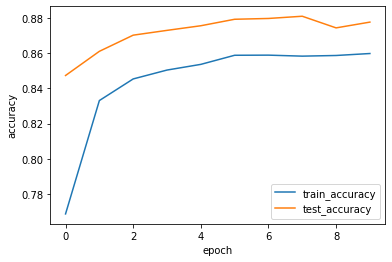

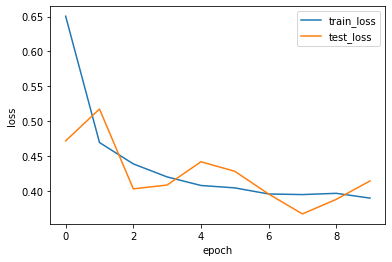

10000/10000 [==============================] - 4s 367us/step
Confusion Matrix:
[[863   0  20  23   4   1  77   3   9   0]
 [  1 970   1  22   2   0   2   0   2   0]
 [ 14   0 871  13  62   0  39   0   1   0]
 [ 31   7  16 883  42   0  18   0   3   0]
 [  1   0 135  31 761   0  71   0   1   0]
 [  0   0   0   0   0 901   0  70   1  28]
 [174   0 122  32  75   0 583   1  13   0]
 [  0   0   0   0   0   3   0 941   0  56]
 [  5   1   9   6   2   1   6   7 962   1]
 [  0   0   0   0   0   3   0  29   1 967]]
Accuracy Score:
87.02


In [7]:
#Task3
#importing libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense, Input, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
import keras
import util_mnist_reader
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Reshape
from sklearn.metrics import confusion_matrix,accuracy_score

fm_x_train, fm_y_train = util_mnist_reader.load_mnist('data/fashion', kind='train')
fm_x_test, fm_y_test = util_mnist_reader.load_mnist('data/fashion', kind='t10k')

def conv_model(x_train, y_train):
    inputs = Input(shape=(784,))
    x = BatchNormalization()(inputs)
    x = Dropout(0.2)(x)
    x = Reshape((28, 28, 1))(x)
    x = Conv2D(32, (3,3), activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Conv2D(32, (3,3), activation='relu')(x)
    x = Dropout(0.5)(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(10, activation='softmax')(x)
    model = Model(input=inputs, output=predictions)
    model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])
    history = model.fit(x_train, to_categorical(y_train), epochs=10, shuffle=True, validation_split=0.33)
    return history

def show_history(history):
    #acc = history.history['binary_accuracy']
    #val_acc = history.history['val_binary_accuracy']
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
#Plotting training accuracy    
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()
#Plotting validation loss    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'test_loss'], loc='best')
    plt.show()

    
conv_history = conv_model(fm_x_train, fm_y_train)
show_history(conv_history)

conv_history.model.evaluate(fm_x_test, to_categorical(fm_y_test))

#simple_history.model.evaluate(fm_x_test, to_categorical(fm_y_test))
predict=conv_history.model.predict(fm_x_test)
print('Confusion Matrix:')
print(confusion_matrix(fm_y_test,predict.argmax(axis=1)))
print('Accuracy Score:')
print(accuracy_score(fm_y_test,predict.argmax(axis=1))*100)
